# 3 Linear Regression
## 3.1 Simple Linear Regression
Simple linear regression lives up to its name: it is a very straightforward approach for predicting a quantitative response $Y$ on the basis of a single predictor variable $X$. It assumes that there is approximately a linear relationship between $X$ and $Y$.
$$Y \approx \beta_0 + \beta_1X \tag{3.1}$$
In Equation 3.1, $\beta_0$ and $\beta_1$ are two unknown constants that represent the intercept and slope terms in the linear model. Together, $\beta_0$ and $\beta_1$ are known as the model coefficients or parameters. Once we have used our training data to produce estimates $\hat\beta_0$ and $\hat\beta_1$ for the model coefficients, we can predict future sales on the basis of a particular value of TV advertising by computing $$\hat y = \hat\beta_0 + \hat\beta_1x \tag{3.2}$$

### 3.1.1 Estimating the Coefficients
In practice, $\beta_0$ and $\beta_1$ are unknown. So before we can use (3.1) to make predictions, we must use data to estimate the coefficients. Our goal is to obtain coefficient estimates $\hat\beta_0$ and $\hat\beta_1$ such that the linear model (3.1) fits the available data well. By far the most common approach involves minimizing the least squares criterion, and we take that approach in this chapter.

Let $\hat y_i = \hat\beta_0 + \hat\beta_1 x_i$ be the prediction for $Y$ based on the ith value of $X$. Then $e_i = y_i − \hat y_i$ represents the ith residual. We define the residual sum of squares (RSS) as $$RSS=e_1^2+e_2^2+\cdots+e_n^2$$ or equivalently as $$RSS=(y_1-\hat\beta_0 - \hat\beta_1 x_1)^2+(y_2-\hat\beta_0 - \hat\beta_1 x_2)^2+\cdots+(y_n-\hat\beta_0 - \hat\beta_1 x_n)^2\tag{3.3}$$

The least squares approach chooses $\hat\beta_0$ and $\hat\beta_1$ to minimize the RSS. Using some calculus, one can show that the minimizers are 
$$
\begin{align}
\hat\beta_1&=\frac{\sum_{i=0}^{n}{(x_i-\bar x)(y_i-\bar y)}}{\sum_{i=0}^{n}{(x_i-\bar x)^2}}\tag{3.4},\\
\hat\beta_0 &= \bar y - \hat\beta_1\bar x
\end{align}
$$


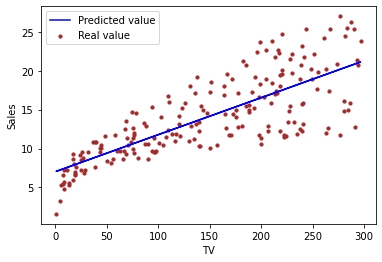

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from math import *
import seaborn as sns
import patsy

Advertising = pd.read_csv('Advertising.csv',index_col=0)

# Regress sales on TV
x = Advertising['TV']
y = Advertising['sales']

X = sm.add_constant(x) # Add the constant
ols = sm.OLS(y,X).fit()

# Figure 3.1
plt.scatter(x,y,label='Real value',c='brown',s=10)
plt.plot(x,ols.fittedvalues,label='Predicted value',color='b')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

Figure 3.1 displays the simple linear regression fit to the Advertising data, where $\hat\beta_0 = 7.03$ and $\hat\beta_1 = 0.0475$. In other words, according to this approximation, an additional \\$1,000 spent on TV advertising is associated with selling approximately 47.5 additional units of the product. 


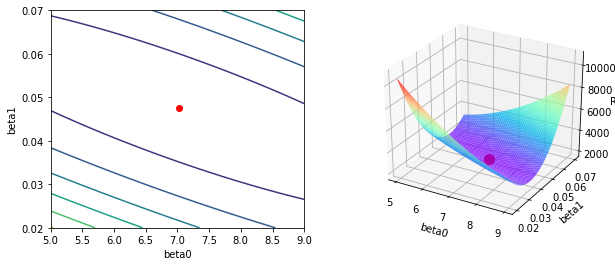

In [2]:
beta0 = np.linspace(5,9,num=100)
beta1 = np.linspace(0.02,0.07,num=100)

x,y = np.meshgrid(beta0,beta1)
z = Advertising[['sales','TV']].apply(lambda i:np.square(i[0]-x-y*i[1]) ,axis=1).sum()
z1 = Advertising[['sales','TV']].apply(lambda i:np.square(i[0]-ols.params[0]-ols.params[1]*i[1]) ,axis=1).sum() 

# Figure 3.2
plt.figure(num=2,figsize=(10,4))
plt.subplot(121)
plt.contour(x, y, z)
plt.scatter(ols.params[0],ols.params[1],c='r') # The least squares estimate 
plt.xlabel('beta0')
plt.ylabel('beta1')

ax = plt.subplot(122, projection='3d')
ax.scatter(ols.params[0],ols.params[1],z1, c='r',s=100) # The least squares estimate 
ax.plot_surface(x,y,z,cmap='rainbow',alpha=0.8)
ax.set_xlabel('beta0')
ax.set_ylabel('beta1')
ax.set_zlabel('RSS')
plt.show()

In Figure 3.2, we have computed RSS for a number of values of $\beta_0$ and $\beta_1$, using the advertising data with sales as the response and TV as the predictor. In each plot, the red dot represents the pair of least squares estimates$(\hat\beta_0,\hat\beta_1)$ given by (3.4). These values clearly minimize the RSS.

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates
We assume that the true relationship between $X$ and $Y$ takes the form
$$ Y=\beta_0+\beta_1 X+\epsilon\tag{3.5}$$
where $\epsilon$ is a mean-zero random error term. The error term is a catch-all for what we miss with this simple model: the true relationship is probably not linear, there may be
other variables that cause variation in Y , and there may be measurement error. We typically assume that the error term is independent of X.

We can wonder how close $\hat\beta_0$ and $\hat\beta_1$ are to the true values $\beta_0$ and $\beta_1$. To compute the standard errors
associated with $\beta_0$ and $\beta_1$, we use the following formulas:
$$SE(\hat\beta_0)^2=\sigma^2[\frac{1}{n}+\frac{\bar x^2}{\sum_{i=0}^{n}{(x_i-\bar x)^2}}], \quad SE(\hat\beta_1)^2=\frac{\sigma^2}{\sum_{i=0}^{n}{(x_i-\bar x)^2}}\tag{3.8}$$
where$\sigma^2=Var(\epsilon)$. For these formulas to be strictly valid, we need to assume that the errors $\epsilon_i$ for each observation are uncorrelated with common
variance $\sigma^2$. In general, $\sigma^2$ is not known, but can be estimated from the data. The estimate of $\sigma$ is known as the residual standard error, and is given by the formula$RSE=\sqrt{RSS/(n-2)}$.

Standard errors can be used to compute confidence intervals. A 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter. For linear regression, the 95% confidence interval for $\beta_1$ approximately takes the form
$$\hat\beta_1\pm2*SE(\hat\beta_1)\tag{3.9}$$

Standard errors can also be used to perform hypothesis tests on the coefficients. The most common hypothesis test involves testing the null hypothesis of
$$H_0: \beta_1 = 0$$
versus the alternative hypothesis
$$H_1: \beta_1 \neq 0 $$
In practice, we compute a t-statistic, given by
$$t=\frac{\hat\beta_1 -0}{SE(\hat\beta_1)}\tag{3.14}$$
which measures the number of standard deviations that $\beta_1$ is away from 0. The t-distribution has a bell shape and for values of n greater than approximately 30 it is quite similar to the normal distribution. Consequently, it is a simple
matter to compute the probability of observing any number equal to |t| or larger in absolute value. We call this probability the p-value.

Table 3.1 provides details of the least squares model for the regression of number of units sold on TV advertising budget for the Advertising data.

In [3]:
# Table 3.1
ols.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,7.032594,0.457843,15.360275,1.406300e-35,6.129719,7.935468
TV,0.047537,0.002691,17.667626,1.467390e-42,0.042231,0.052843


### 3.1.3 Assessing the Accuracy of the Model
#### Residual Standard Error
The RSE is an estimate of the standard deviation of $\epsilon$. It is computed using the formula
$$ RSE=\sqrt{\frac{1}{n-2}RSS}=\sqrt{\frac{1}{n-2}\sum_{i=1}^{n}{(y_i-\hat y_i)^2}}\tag{3.15}$$
The RSE is considered a measure of the lack of fit of the model (3.5) to the data. 

#### $R^2$ Statistic
The $R^2$ statistic provides an alternative measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1, and is independent of the scale of $Y$.
To calculate $R^2$, we use the formula
$$R^2=\frac{TSS-RSS}{TSS}=1-\frac{RSS}{TSS}\tag{3.17}$$
where$TSS=\sum{(y_i-\bar y)^2}$is the total sum of squares.
TSS measures the total variance in the response $Y$, RSS measures the amount of variability that is left unexplained after performing the regression. Hence, $R^2$measures the proportion of variability in $Y$ that can be explained using $X$.

The $R^2$ statistic is a measure of the linear relationship between $X$ and $Y$. Recall that correlation, defined as
$$Cor(X,Y)=\frac{\sum_{i=1}^{n}{(x_i-\bar x)(y_i-\bar y)}}{\sqrt{\sum_{i=1}^{n}{(x_i-\bar x)^2}}\sqrt{\sum_{i=1}^{n}{(y_i-\bar y)^2}}}\tag{3.18}$$
is also a measure of the linear relationship between $X$ and $Y$. In fact, it can be shown that in the simple
linear regression setting, $R^2=r^2$.

In [4]:
# Table 3.2
pd.DataFrame({'Quantity':['Residual Standard Error','R-squared','F-statistic'],'Value':[np.sqrt(ols.mse_resid),ols.rsquared,ols.fvalue]})

,Quantity,Value
0,Residual Standard Error,3.258656
1,R-squared,0.611875
2,F-statistic,312.144994


## 3.2 Multiple Linear Regression
How can we extend our analysis of the advertising data in order to accommodate these two additional predictors? One option is to run three separate simple linear regressions, each of which uses a different advertising medium as a predictor. For instance, we can fit a simple linear regression to predict sales on the basis of the amount spent on radio advertisements. Results are shown in Table 3.3.

In [5]:
# Regress sales on radio
x1 = Advertising['radio']
x2 = Advertising['newspaper']
y = Advertising['sales']

X1 = sm.add_constant(x1) # Add the constant
X2 = sm.add_constant(x2) # Add the constant
ols1 = sm.OLS(y,X1).fit()
ols2 = sm.OLS(y,X2).fit()

# Table 3.3
ols1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,9.311638,0.562900,16.542245,3.561071e-39,8.201588,10.421688
radio,0.202496,0.020411,9.920765,4.354966e-19,0.162244,0.242747


In [6]:
# Table 3.3
ols2.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,12.351407,0.621420,19.876096,4.713507e-49,11.125956,13.576859
newspaper,0.054693,0.016576,3.299591,1.148196e-03,0.022005,0.087381


Instead of fitting a separate simple linear regression model for each predictor, a better approach is to extend the simple linear regression model(3.5) so that it can directly accommodate multiple predictors. We can do this by giving each predictor a separate slope coefficient in a single model.
In general, suppose that we have p distinct predictors. Then the multiple linear regression model takes the form
$$Y=\beta_0+\beta_1 X_1+\beta_2 X_2+\cdots+\beta_p X_p+\epsilon\tag{3.19}$$

### 3.2.1 Estimating the Regression Coefficients
The parameters are estimated using the same least squares approach that we saw in the context of simple linear regression. We choose $\beta_0$, $\beta_1$,...,$\beta_p$ to minimize the sum of squared residuals
$$RSS=\sum_{i=1}^{n}{(y_i-\hat y_i)^2}=\sum_{i=1}^{n}{(y_i-\hat\beta_0-\hat\beta_1 x_{i1}-\cdots-\hat\beta_p x_{ip})^2}\tag{3.22}$$

<img src="img/3.4.jpg" style="zoom:40%" />
Figure 3.4 illustrates an example of the least squares fit to a toy data set with p = 2 predictors.

In [7]:
x = Advertising[['TV','radio','newspaper']]
y = Advertising['sales']
X = sm.add_constant(x)
ols = sm.OLS(y, X).fit()

# Table 3.4
ols.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,2.938889,0.311908,9.422288,1.267295e-17,2.323762,3.554016
TV,0.045765,0.001395,32.808624,1.509960e-81,0.043014,0.048516
radio,0.188530,0.008611,21.893496,1.505339e-54,0.171547,0.205513
newspaper,-0.001037,0.005871,-0.176715,8.599151e-01,-0.012616,0.010541



Table 3.4 displays the multiple regression coefficient estimates when TV, radio, and newspaper advertising budgets are used to predict product sales using the Advertising data.

Comparing these coefficient estimates to those displayed in Tables 3.1 and 3.3, we notice that the multiple regression coefficient estimates for TV and radio are pretty similar to the simple linear regression coefficient estimates. However, while the newspaper regression coefficient estimate in Table 3.3 was significantly non-zero, the coefficient estimate for newspaper in the multiple regression model is close to zero, and the corresponding p-value is no longer significant, with a value around 0.86. This illustrates that the simple and multiple regression coefficients can be quite different.

Consider the correlation matrix for the three predictor variables and response variable, displayed in Table 3.5. Notice that the correlation between radio and newspaper is 0.35. This reveals a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising.

In [8]:
# Table 3.5
Advertising[['TV','radio','newspaper','sales']].corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000



Now suppose that the multiple regression is correct and newspaper advertising has no direct impact on sales, but radio
advertising does increase sales. Then in markets where we spend more on radio our sales will tend to be higher, and as our correlation matrix shows, we also tend to spend more on newspaper advertising in those same markets. Hence, in a simple linear regression which only examines sales versus newspaper, we will observe that higher values of newspaper tend to be associated with higher values of sales, even though newspaper advertising does not actually affect sales. So newspaper sales are a surrogate for radio advertising; newspaper gets “credit” for the effect of radio on sales.

### 3.2.2 Some Important Questions
#### One: Is There a Relationship Between the Response and Predictors?
As in the simple linear regression setting, we use a hypothesis test to answer this question. We test the null
hypothesis,
$$ H_0: \beta_1=\beta_2=\cdots=\beta_p=0$$
versus the alternative
$$ H_a:  at\; least\; one\; \beta_j\; is\; non-zero.$$
This hypothesis test is performed by computing the F-statistic,
$$F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)}\tag{3.23}$$
If $H_a$ is true,  we expect F to be greater than 1.
The F-statistic for the multiple linear regression model obtained by regressing sales onto radio, TV, and newspaper is shown in Table 3.6.

In [9]:
# Table 3.6
pd.DataFrame({'Quantity':['Residual Standard Error','R-squared','F-statistic'],'Value':[np.sqrt(ols.mse_resid),ols.rsquared,ols.fvalue]})

,Quantity,Value
0,Residual Standard Error,1.685510
1,R-squared,0.897211
2,F-statistic,570.270704


Given these individual p-values for each variable, why do we need to look at the overall F-statistic? After all, it seems likely that if any one of the p-values for the individual variables is very small, then at least one of the predictors is related to the response. However, this logic is flawed, especially when the number of predictors p is large.

For instance, consider an example in which $p = 100$ and $H_0: \beta_1 = \beta_2=\cdots = \beta_p = 0$is true, so no variable is truly associated with the response. In this situation, about 5% of the p-values associated with each variable will be below 0.05 by chance. In other words, we expect to see approximately five small p-values even in the absence of
any true association between the predictors and the response.

However, the F-statistic does not suffer from this problem because it adjusts for the number of predictors. Hence, if $H_0$ is true, there is only a 5% chance that the F-statistic will result in a p-value below 0.05, regardless of the number of predictors or the number of observations.

#### Two: Deciding on Important Variables
The task of determining which predictors are associated with
the response, in order to fit a single model involving only those predictors, is referred to as variable selection. Here we will provide only a brief outline of some classical approaches.

* Forward selection. We begin with the null model, then fit p simple linear regressions and add to the null model the variable that results in the lowest RSS. 
* Backward selection. We start with all variables in the model, and remove the variable with the largest p-value.
* Mixed selection. This is a combination of forward and backward selection. We start with no variables in the model, and as with forward selection, we add the variable that provides the best fit. We continue to add variables one-by-one. if at any point the p-value for one of the variables in the model rises above a certain threshold, then we remove that variable from the model.

#### Three: Model Fit
We can see that there is a small increase in $R^2$ if we include newspaper advertising in the model that already contains TV and radio advertising, even though we saw earlier that the p-value for newspaper advertising in Table 3.4 is not significant. It turns out that $R^2$ will always increase when more variables are added to the model, even if those variables are only weakly associated with the response.

The model that contains only TV and radio as predictors has an RSE of 1.681, and the model that also contains newspaper as a predictor has an RSE of 1.686 (Table 3.6). In contrast, the model that contains only TV has an RSE of 3.26 (Table 3.2). This corroborates our previous conclusion that a model that uses TV and radio expenditures to predict sales is much more accurate. In general RSE is defined as
$$RSE=\sqrt{\frac{1}{n-p-1}RSS}\tag{3.25}$$
Thus, models with more variables can have higher RSE if the decrease in RSS is small relative to the increase in p.

In addition to looking at the RSE and $R^2$ statistics just discussed, it can be useful to plot the data. Graphical summaries can reveal problems with a model that are not visible from numerical statistics. For example, Figure 3.5 displays a three-dimensional plot of TV and radio versus sales.

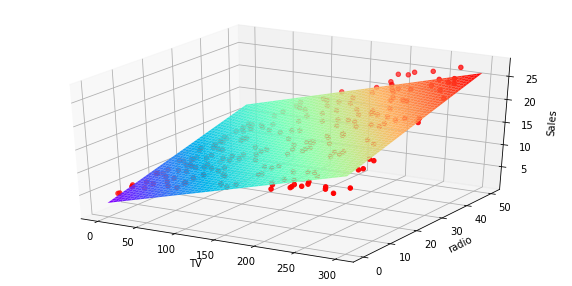

In [10]:
x = Advertising['TV']
y = Advertising['radio']
z = Advertising['sales']

x1 = np.column_stack((x,y))
X = sm.add_constant(x1)

ols = sm.OLS(z,X).fit()

x_new = np.linspace(0,300,num=500)
y_new = np.linspace(0,50,num=500)
X_new, Y_new = np.meshgrid(x_new, y_new)
Z = ols.params[0]+ols.params[1]*X_new+ols.params[2]*Y_new

# Figure 3.5
plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.scatter(x,y,z, c='r')
ax.plot_surface(X_new,Y_new,Z,cmap='rainbow')
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('Sales')
plt.show()

In particular, the linear model seems to overestimate sales for instances in which most of the advertising money was spent exclusively on either TV or radio. It underestimates sales for
instances where the budget was split between the two media.

#### Four: Predictions
Once we have fit the multiple regression model, it is straightforward to apply (3.21) in order to predict the response $Y$ on the basis of a set of values for the predictors.
However, there are three sorts of uncertainty associated with this prediction.

1. The coefficient estimates $\hat\beta_0,\hat\beta_1,\cdots,\hat\beta_p$ are estimates for $\beta_0,\beta_1,\cdots,\beta_p$. That is, the least squares plane
$$ \hat Y=\hat\beta_0+\hat\beta_1 X_1+\cdots+\hat\beta_p X_p$$
is only an estimate for the true population regression plane
$$ f(X)=\beta_0 +\beta_1 X_1+\cdots+\beta_p X_p$$
We can compute a confidence interval in order to determine how close $\hat Y$ will be to f(X).

2.  Of course, in practice assuming a linear model for $f(X)$ is almost always an approximation of reality, so there is an additional source of potentially reducible error which we call model bias. So when we use a linear model, we are in fact estimating the best linear approximation to the true surface. However, here we will ignore this discrepancy, and operate as if the linear model were correct.
3. Even if we knew $f(X)$, the response value cannot be predicted perfectly because of the random error $\epsilon$. How much will $Y$ vary from $\hat Y$ ? We use prediction intervals to answer this question. Prediction intervals are always wider than confidence intervals, because they incorporate both the error in the estimate for $f(X)$ and the uncertainty as to how much an individual point will differ from the population regression plane .

## 3.3 Other Considerations in the Regression Model
### 3.3.1 Qualitative Predictors
The Credit data set contains information about balance, age,
cards, education, income, limit, and rating for a number of potential customers.

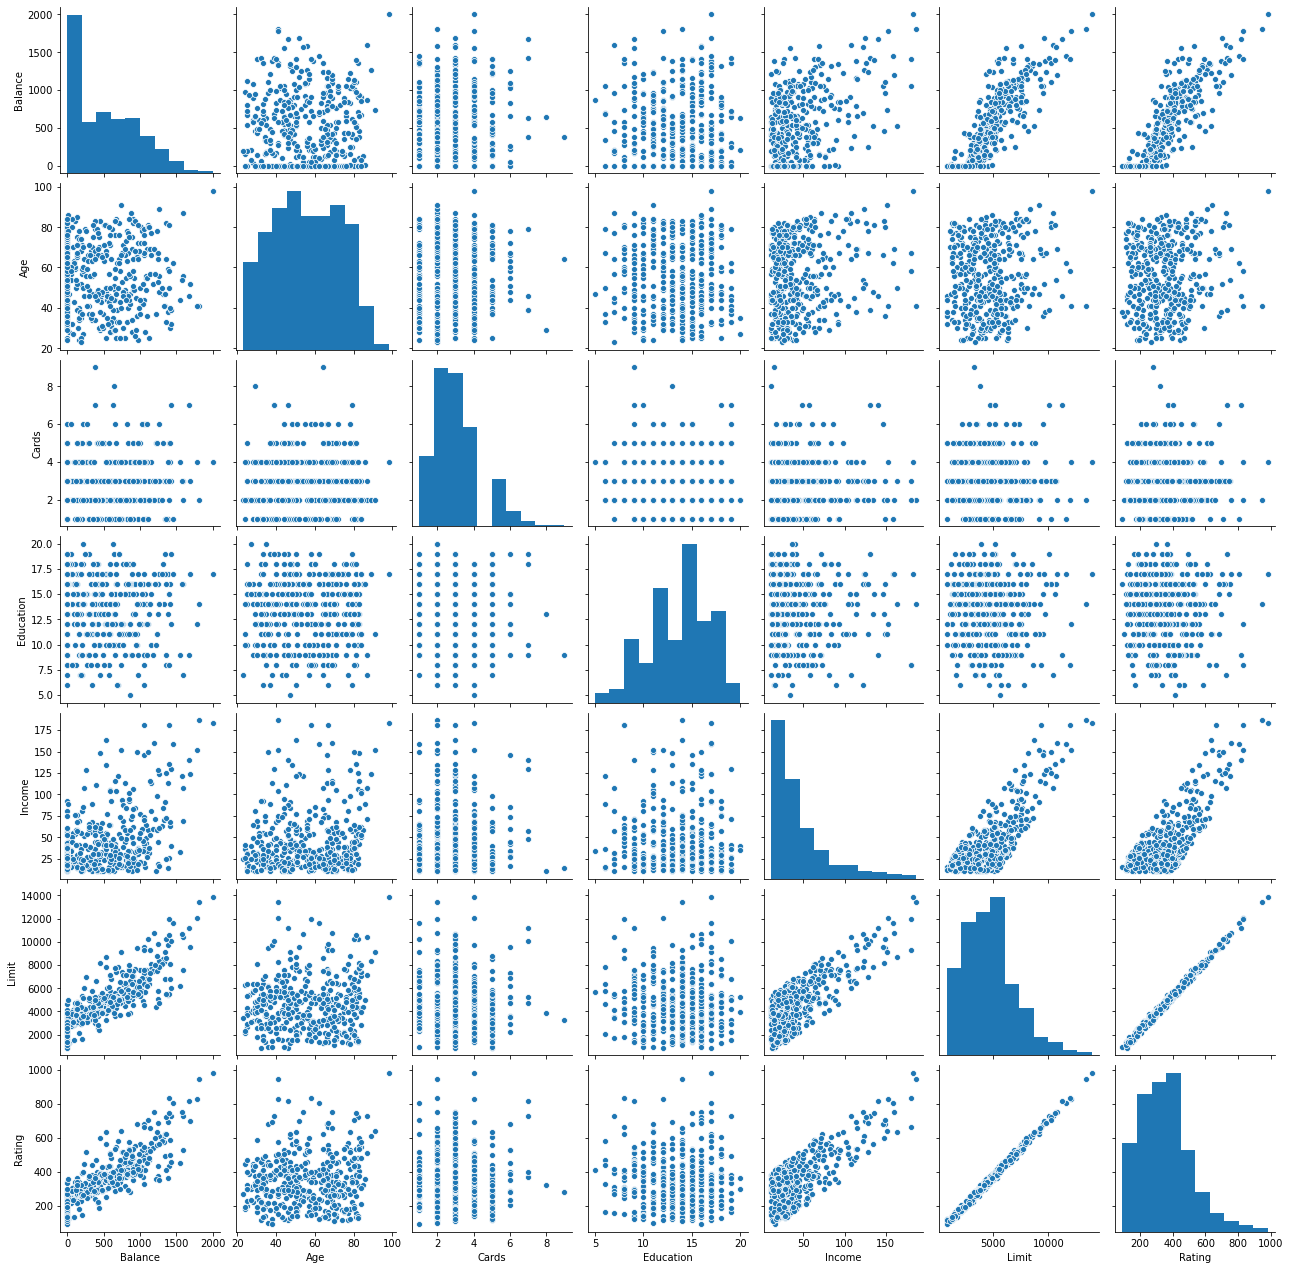

In [11]:
Credit = pd.read_csv('Credit.csv',index_col=0)
# Figure 3.6
sns.pairplot(Credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])
plt.show()

#### Predictors with Only Two Levels
Suppose that we wish to investigate differences in credit card balance between males and females. We simply create an indicator or dummy variable that takes on two possible dummy
numerical values. For example, based on the gender variable, we can create variable a new variable that takes the form
$$x_i=\begin{cases}
1 & if\; ith\; person\; is\; female \\ 0 & if\; ith\; person\; is\; male
\end{cases}\tag{3.26}$$
and use this variable as a predictor in the regression equation. This results in the model
$$
y_i=\beta_0+\beta_1 x_i+\epsilon_i=\begin{cases}
\beta_0+\beta_1+\epsilon_i & if\; ith\; person\; is\; female \\ \beta_0+\epsilon_i & if\; ith\; person\; is\; male
\end{cases}\tag{3.27}
$$

Table 3.7 displays the coefficient estimates and other information associated with the model (3.27). The average credit card debt for males is estimated to be \\$509.80, whereas females are estimated to carry \\$19.73 in additional debt for a total of \\$509.80 + \\$19.73 = \\$529.53. However, we notice that the p-value for the dummy variable is very high. This indicates that there is no statistical evidence of a difference in average credit card balance between the genders.

In [12]:
dummy_fields = ['Gender','Student','Married','Ethnicity']
for i in dummy_fields:
    dummies = pd.get_dummies(Credit[i], prefix=i)
    Credit = pd.concat([Credit,dummies],axis=1)
x = Credit['Gender_Female']
y = Credit['Balance']

X = sm.add_constant(x)
ols = sm.OLS(y,X).fit()

# Table 3.7
ols.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,509.803109,33.128077,15.388853,2.908941e-42,444.675221,574.930997
Gender_Female,19.733123,46.051210,0.428504,6.685161e-01,-70.800900,110.267146


#### Qualitative Predictors with More than Two Levels
When a qualitative predictor has more than two levels, a single dummy variable cannot represent all possible values. In this situation, we can create additional dummy variables. For example, for the ethnicity variable we create two dummy variables. The first could be
$$
x_{i1}=\begin{cases}
1 & if\; ith\; person\; is\; Asian \\ 
0 & if\; ith\; person\; is\; not\; Asian
\end{cases}\tag{3.28}
$$
and the second could be
$$
x_{i2}=\begin{cases}
1 & if\; ith\; person\; is\;  Caucasian \\ 
0 & if\; ith\; person\; is\; not\; Caucasian
\end{cases}\tag{3.29}
$$
Then both of these variables can be used in the regression equation, in order to obtain the model
$$
y_i=\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2}+\epsilon_i=\begin{cases}
\beta_0+\beta_1+\epsilon_i & if\; ith\; person\; is\; Asian \\ 
\beta_0+\beta_2+\epsilon_i & if\; ith\; person\; is\; not\; Asian\\
\beta_0+\epsilon_i & if\; ith\; person\; is\; African\;American
\end{cases}\tag{3.30}
$$
There will always be one fewer dummy variable than the number of levels. The level with no dummy variable—African American in this example—is known as the baseline.

In [13]:
x = Credit[['Ethnicity_Asian','Ethnicity_Caucasian']]
y = Credit['Balance']

X = sm.add_constant(x)
ols = sm.OLS(y,X).fit()

# Table 3.8
ols.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,531.000000,46.318683,11.464057,1.774117e-26,439.939441,622.060559
Ethnicity_Asian,-18.686275,65.021075,-0.287388,7.739652e-01,-146.514940,109.142391
Ethnicity_Caucasian,-12.502513,56.681038,-0.220577,8.255355e-01,-123.935021,98.929995


### 3.3.2 Extensions of the Linear Model
The standard linear regression model (3.19) provides interpretable results and works quite well on many real-world problems. However, it makes several highly restrictive assumptions that are often violated in practice. Two of the most important assumptions state that the relationship between the predictors and response are additive and linear. The additive assumption means that the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors. The linear assumption states that the change in the response $Y$ due to a one-unit change in $X_j$ is
constant, regardless of the value of $X_j$.

Here, we briefly examine some common classical approaches for extending the linear model.

#### Removing the Additive Assumption
In our previous analysis of the Advertising data, we concluded that both TV and radio seem to be associated with sales. However, that simple model may be incorrect. Suppose that spending money on radio advertising actually increases the effectiveness of TV advertising, so that the slope term for TV should increase as radio increases.

One way of extending this model to allow for interaction effects is to include a third predictor, called an interaction term:
$$Y=\beta_0+\beta_1 X_1+\beta_2 X_2+\beta_3 X_1X_2+\epsilon\tag{3.31}$$
How does inclusion of this interaction term relax the additive assumption?
Notice that (3.31) can be rewritten as
$$ Y=\beta_0+(\beta_1+\beta_3 X_2)X_1 +\beta_2 X_2 +\epsilon=\beta_0+\tilde\beta_1 X_1+\beta_2 X_2 +\epsilon\tag{3.32}$$
Since $\tilde\beta_1$ changes with $X_2$, the effect of $X_1$ on $Y$ is no longer constant: adjusting $X_2$ will change the impact of $X_1$ on $Y$.

The coefficients that result from fitting the model (3.32) are given in Table 3.9. The results in Table 3.9 strongly suggest that the model that includes the interaction term is superior to the model that contains only main effects.  An increase in TV advertising of \\$1,000 is associated with increased sales of $(\beta_1+\beta_3×radio)×1000 = 19+1.1×radio$ units.

In [14]:
# * includes lstat, age, and the interaction term lstat × age
# : only includes the interaction term lstat × age

f = 'sales~TV*radio' 
y, X = patsy.dmatrices(f, Advertising, return_type='matrix')
ols = sm.OLS(y, X).fit()

# Table 3.9
ols.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,6.750220,0.247871,27.232755,1.541461e-68,6.261383,7.239058
TV,0.019101,0.001504,12.698953,2.363605e-27,0.016135,0.022067
radio,0.028860,0.008905,3.240815,1.400461e-03,0.011298,0.046423
TV:radio,0.001086,0.000052,20.726564,2.757681e-51,0.000983,0.001190


The concept of interactions applies just as well to qualitative variables, or to a combination of quantitative and qualitative variables.
Consider the Credit data set from Section 3.3.1, and suppose
that we wish to predict balance using the income (quantitative) and student (qualitative) variables. In the absence of an interaction term, the model takes the form
$$
balance_i=\beta_0+\beta_1\times income_i+\begin{cases}
\beta_2 & if\; ith\; person\; is\; a\; student \\ 
0 & if\; ith\; person\; is\; not\;  a\; student
\end{cases}\tag{3.34}
$$
Notice that this amounts to fitting two parallel lines to the data, one for students and one for non-students. This is illustrated in the left-hand panel of Figure 3.7. The fact that the lines are parallel means that the average effect on balance of a one-unit increase in income does not depend on whether or not the individual is a student.

This limitation can be addressed by adding an interaction variable, created by multiplying income with the dummy variable for student.
Our model now becomes
$$
balance_i=\beta_0+\beta_1\times income_i+\begin{cases}
\beta_2+\beta_3\times income_i & if\; student \\ 
0 & if\; not\; student
\end{cases}\tag{3.35}
$$
The right-hand panel of Figure 3.7 shows the estimated relationships between income and balance for students
and non-students in the model (3.35). We note that the slope for students is lower than the slope for non-students. This suggests that increases in income are associated with smaller increases in credit card balance among students as compared to non-students.


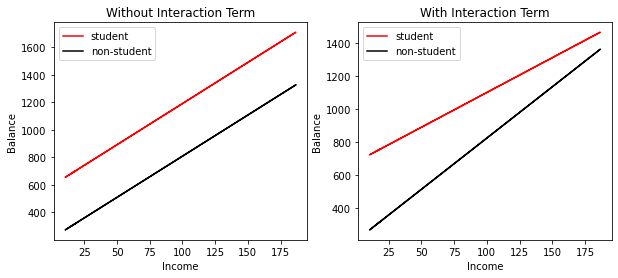

In [15]:
# Without interaction term
x1 = Credit[['Income','Student_Yes']]
y = Credit['Balance']
X1 = sm.add_constant(x1)
ols1 = sm.OLS(y,X1).fit()

x_yes = np.column_stack((Credit['Income'],np.ones(len(Credit))))
x_no = np.column_stack((Credit['Income'],np.zeros(len(Credit))))

X_yes = sm.add_constant(x_yes, has_constant='add')
X_no = sm.add_constant(x_no, has_constant='add')

y_yes = ols1.predict(X_yes)
y_no = ols1.predict(X_no)

# With interaction term
f = 'Balance~Income*Student_Yes' 
y, X2 = patsy.dmatrices(f, Credit, return_type='matrix')
ols2 = sm.OLS(y,X2).fit()

x_yes2 = np.column_stack((Credit['Income'],np.ones(len(Credit)),Credit['Income']))
x_no2 = np.column_stack((Credit['Income'],np.zeros(len(Credit)),np.zeros(len(Credit))))

X_yes2 = sm.add_constant(x_yes2, has_constant='add')
X_no2 = sm.add_constant(x_no2, has_constant='add')

y_yes2 = ols2.predict(X_yes2)
y_no2 = ols2.predict(X_no2)

# Figure 3.7
plt.figure(num=2,figsize=(10,4))
plt.subplot(121)
plt.plot(Credit['Income'],y_yes,label='student',c='r')
plt.plot(Credit['Income'],y_no,label='non-student',c='black')
plt.ylabel('Balance')
plt.xlabel('Income')
plt.title('Without Interaction Term')
plt.legend()

plt.subplot(122)
plt.plot(Credit['Income'],y_yes2,label='student',c='r')
plt.plot(Credit['Income'],y_no2,label='non-student',c='black')
plt.ylabel('Balance')
plt.xlabel('Income')
plt.title('With Interaction Term')
plt.legend()
plt.show()

#### Non-linear Relationships
As discussed previously, the linear regression model(3.19) assumes a linear relationship between the response and predictors. But in some cases, the true relationship between the response and the predictors may be non-linear.


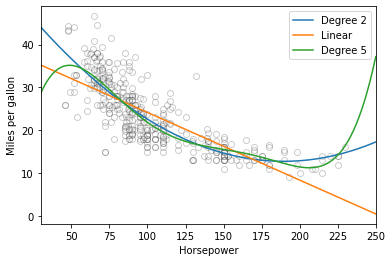

In [16]:
Auto = pd.read_csv('Auto.csv')
# Horsepower has strings, convert to np.nan
Auto['horsepower'] = Auto['horsepower'].replace('?', np.nan)
x = Auto['horsepower'].astype(float)
y = Auto['mpg']

# Linear
X = sm.add_constant(x)
ols = sm.OLS(y,X,missing='drop').fit() # Drop the missing value

x_new = np.linspace(30,250,num=500)
X_new = sm.add_constant(x_new)
y1 = ols.predict(X_new)

# Degree 2
x2 = np.column_stack((x, x**2))
X2 = sm.add_constant(x2) 
ols2 = sm.OLS(y,X2,missing='drop').fit() # Drop the missing value

x2_new =  np.column_stack((x_new, x_new**2))
X2_new = sm.add_constant(x2_new)
y2 = ols2.predict(X2_new)

# Degree 5
x5 = np.column_stack((x, x**2, x**3, x**4, x**5))
X5 = sm.add_constant(x5) 
ols5 = sm.OLS(y,X5,missing='drop').fit() # Drop the missing value

x5_new =  np.column_stack((x_new, x_new**2, x_new**3, x_new**4, x_new**5))
X5_new = sm.add_constant(x5_new)
y5 = ols5.predict(X5_new)

# Figure 3.8
plt.plot(x_new,y2,label='Degree 2')
plt.plot(x_new,y1,label='Linear')
plt.plot(x_new,y5,label='Degree 5') 
plt.scatter(x,y,c='white',edgecolors='black',alpha=0.2)
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.xlim(30,250)
plt.legend()
plt.show()

Consider Figure 3.8, in which the mpg (gas mileage in miles per gallon) versus horsepower is shown for a number of cars in the Auto data set. The points in Figure 3.8 seem to have a quadratic shape, suggesting that a quadratic model of the form
$$
mpg=\beta_0+\beta_1\times horsepower+\beta_2\times horsepower^2+\epsilon\tag{3.36}
$$
may provide a better fit. 
Equation 3.36 involves predicting mpg using a non-linear function of horsepower. But it is still a linear model!
The quadratic fit appears to be substantially better than the fit obtained when just the linear term is included. The $R_2$ of the quadratic fit is 0.688, compared to 0.606 for the linear fit, and the p-value in Table 3.10 for the quadratic term is highly significant.


In [17]:
# Table 3.10
ols2.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,56.900100,1.800427,31.603673,1.740911e-109,53.360315,60.439885
x1,-0.466190,0.031125,-14.978164,2.289429e-40,-0.527383,-0.404996
x2,0.001231,0.000122,10.080093,2.196340e-21,0.000991,0.001471


### 3.3.3 Potential Problems
1. Non-linearity of the Data

The linear regression model assumes that there is a straight-line relationship between the predictors and the response. If the true relationship is far from linear, then virtually all of the conclusions that we draw from the fit are suspect. In addition, the prediction accuracy of the model can be significantly reduced.
Residual plots are a useful graphical tool for identifying non-linearity.

The left panel of Figure 3.9 displays a residual plot from the linear regression of mpg onto horsepower.  In contrast, the right-hand panel of Figure 3.9 displays the residual
plot that results from the model (3.36), which contains a quadratic term. There appears to be little pattern in the residuals, suggesting that the quadratic term improves the fit to the data.

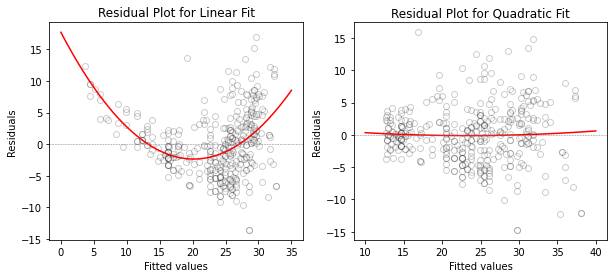

In [18]:
resid1 = ols.resid
resid2 = ols2.resid

# Linear fit
parameter1 = np.polyfit(ols.fittedvalues,resid1,2)
p1 = np.poly1d(parameter1)

# Quadratic fit
parameter2 = np.polyfit(ols2.fittedvalues,resid2,2)
p2 = np.poly1d(parameter2)

xt1=np.linspace(0,35,num=100)
xt2=np.linspace(10,40,num=100)

# Figure 3.9
# Use polynomial function to fit, here I choose quadratic function
plt.figure(num=2,figsize=(10,4))
plt.subplot(121)
plt.plot(xt1, p1(xt1), color='r')
plt.scatter(ols.fittedvalues,resid1,c='white',edgecolors='black',alpha=0.2)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.axhline(y=0,ls='--',c='gray',lw=0.5)
plt.title('Residual Plot for Linear Fit')

plt.subplot(122)
plt.plot(xt2, p2(xt2), color='r')
plt.scatter(ols2.fittedvalues,resid2,c='white',edgecolors='black',alpha=0.2)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residual Plot for Quadratic Fit')
plt.axhline(y=0,ls='--',c='gray',lw=0.5)
plt.show()

2. Correlation of Error Terms

An important assumption of the linear regression model is that the error terms are uncorrelated. If in fact there
is correlation among the error terms, then the estimated standard errors will tend to underestimate the true standard errors. As a result, confidence and prediction intervals will be narrower than they should be.

Such correlations frequently occur in the context of time series data. In many cases, observations that are obtained at adjacent time points will have positively correlated errors. In order to determine if this is the case for a given data set, we can plot the residuals from our model as a function of time.

Figure 3.10 provides an illustration. In the top panel, we see
the residuals from a linear regression fit to data generated with uncorrelated errors. There is no evidence of a time-related trend in the residuals. In contrast, the residuals in the bottom panel are from a data set in which adjacent errors had a correlation of 0.9. Now there is a clear pattern in the residuals—adjacent residuals tend to take on similar values.
<img src="img/3.10.jpg" style="zoom:50%" />

3. Non-constant Variance of Error Terms

Another important assumption of the linear regression model is that the error terms have a constant variance, $Var(\epsilon_i)=\sigma^2$. Unfortunately, it is often the case that the variances of the error terms are non-constant. For instance, the variances of the error terms may increase
with the value of the response. One can identify non-constant variances in the errors, or heteroscedasticity, from the presence of a funnel shape in heterosceda- the residual plot.
<img src="img/3.11.jpg" style="zoom:50%" />
An example is shown in the left-hand panel of Figure 3.11, sticity in which the magnitude of the residuals tends to increase with the fitted values. When faced with this problem, one possible solution is to transform the response $Y$ using a concave function such as $log Y$.  The right-hand panel
of Figure 3.11 displays the residual plot after transforming the response using $logY$.

4. Outliers

An outlier is a point for which $y_i$ is far from the value predicted by the outlier model. Outliers can arise for a variety of reasons, such as incorrect recording of an observation during data collection.
<img src="img/3.12.jpg" style="zoom:70%" />
The red point (observation 20) in the left-hand panel of Figure 3.12 illustrates a typical outlier. In this case, removing the outlier has little effect on the least squares
line. However, it can cause other problems. For instance, in this example, the RSE is 1.09 when the outlier is included in the regression, but it is only 0.77 when the outlier is removed. 

Residual plots can be used to identify outliers. In this example, the outlier is clearly visible in the residual plot illustrated in the center panel of Figure 3.12. But in practice, it can be difficult to decide how large a residual needs to be before we consider the point to be an outlier. To address this problem, instead of plotting the residuals, we can plot the studentized residuals, computed by dividing each residual $\epsilon_i$ by its estimated standard studentized error. Observations whose studentized residuals are greater than 3 in abso- residual lute value are possible outliers.

5. High Leverage Points

We just saw that outliers are observations for which the response $y_i$ is unusual given the predictor $x_i$. In contrast, observations with high leverage high leverage
have an unusual value for $x_i$.For example, observation 41 in the left-hand panel of Figure 3.13 has high leverage, in that the predictor value for this observation is large relative to the other observations. Comparing the left-hand
panels of Figures 3.12 and 3.13, we observe that removing the high leverage observation has a much more substantial impact on the least squares line than removing the outlier. In fact, high leverage observations tend to have a sizable impact on the estimated regression line. 
<img src="img/3.13.jpg" style="zoom:70%" />
In a simple linear regression, high leverage observations are fairly easy to identify, since we can simply look for observations for which the predictor value is outside of the normal range of the observations. But in a multiple linear regression with many predictors, it is possible to have an observation that is well within the range of each individual predictor’s values, but that is unusual in terms of the full set of predictors. An example is shown in the center panel of Figure 3.13, most of the observations’ predictor values fall within the blue dashed ellipse, but the red observation is well outside of this range. But neither its value for $X_1$ nor its value for $X_2$ is unusual. 
In order to quantify an observation’s leverage, we compute the leverage statistic. For a simple linear regression,
$$
h_i=\frac{1}{n}+\frac{(x_i-\bar x)^2}{\sum_{i'=1}^{n}[(x_{i'}-\bar x)^2]}\tag{3.37}
$$
The right-hand panel of Figure 3.13 provides a plot of the studentized residuals versus hi for the data in the left-hand panel of Figure 3.13. Observation 41 stands out as having a very high leverage statistic as well as a high studentized residual. In other words, it is an outlier as well as a high
leverage observation.

6. Collinearity

Collinearity refers to the situation in which two or more predictor variables collinearity are closely related to one another. The concept of collinearity is illustrated
in Figure 3.14 using the Credit data set. In the left-hand panel of Figure 3.14, the two predictors limit and age appear to have no obvious relationship. In contrast, in the right-hand panel of Figure 3.14, the predictors limit and rating are very highly correlated with each other, and we say that they are collinear. 


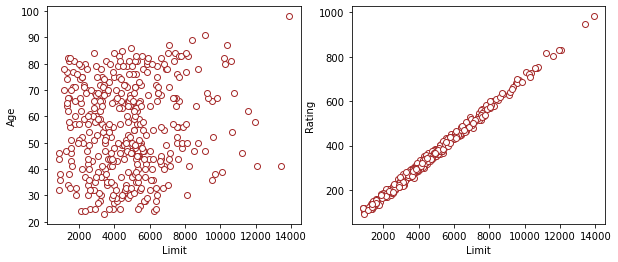

In [19]:
x1 = Credit['Limit']
x2 = Credit['Age']
x3 = Credit['Rating']
y = Credit['Balance']

x_1 = np.column_stack((x1,x2))
x_2 = np.column_stack((x1,x3))
X1 = sm.add_constant(x_1)
X2 = sm.add_constant(x_2)

ols1 = sm.OLS(y,X1).fit()
ols2 = sm.OLS(y,X2).fit()

# Figure 3.14
plt.figure(num=2,figsize=(10,4))
plt.subplot(121)
plt.scatter(x1,x2,c='white',edgecolors='brown')
plt.xlabel('Limit')
plt.ylabel('Age')

plt.subplot(122)
plt.scatter(x1,x3,c='white',edgecolors='brown')
plt.xlabel('Limit')
plt.ylabel('Rating')
plt.show()

Figure 3.15 illustrates some of the difficulties that can result from collinearity. The left-hand panel of Figure 3.15 is a contour plot of the RSS (3.22) associated with different possible coefficient estimates for the regression of balance on limit and age. In contrast, the right-hand panel of Figure 3.15 displays contour plots of the RSS associated with possible coefficient estimates for the regression of balance onto limit and rating, which we know to be highly collinear.

Now the contours run along a narrow valley; there is a broad range of values for the coefficient estimates that result in equal values for RSS. Hence a small change in the data could cause the pair of coefficient values that yield the smallest RSS to move anywhere along this valley.
<img src="img/3.15.jpg" style="zoom:70%" />

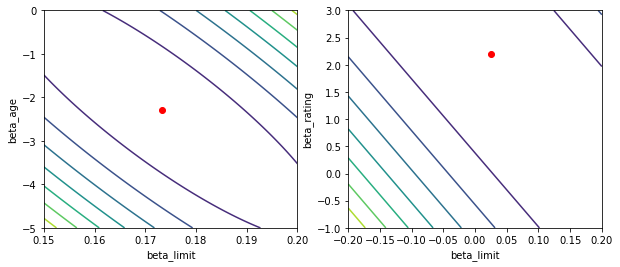

In [20]:
beta1 = np.linspace(0.15,0.2,num=100)
beta2 = np.linspace(-5,0,num=100)

beta3 = np.linspace(-0.2,0.2,num=100)
beta4 = np.linspace(-1,3,num=100)

x1,y1 = np.meshgrid(beta1,beta2)
z1 = Credit[['Balance','Limit','Age']].apply(lambda i:np.square(i[0]-x1*i[1]-y1*i[2]-ols1.params[0]) ,axis=1).sum()

x2,y2 = np.meshgrid(beta3,beta4)
z2 = Credit[['Balance','Limit','Rating']].apply(lambda i:np.square(i[0]-x2*i[1]-y2*i[2]-ols2.params[0]) ,axis=1).sum()


# Figure 3.15
plt.figure(num=2,figsize=(10,4))
plt.subplot(121)
plt.contour(x1, y1, z1)
plt.scatter(ols1.params[1],ols1.params[2],c='r') # The least squares estimate 
plt.xlabel('beta_limit')
plt.ylabel('beta_age')

plt.subplot(122)
plt.contour(x2, y2, z2)
plt.scatter(ols2.params[1],ols2.params[2],c='r') # The least squares estimate 
plt.xlabel('beta_limit')
plt.ylabel('beta_rating')
plt.show()

Collinearity reduces the accuracy of the estimates of the regression coefficients. Table 3.11 compares the coefficient estimates obtained from two separate multiple regression models.


In [21]:
x1 = Credit[['Age','Limit']]
x2 = Credit[['Rating','Limit']]
y = Credit['Balance']

X1 = sm.add_constant(x1)
X2 = sm.add_constant(x2)

ols1 = sm.OLS(y,X1).fit()
ols2 = sm.OLS(y,X2).fit()

# Table 3.11
ols1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-173.410901,43.828387,-3.956589,9.005366e-05,-259.575644,-87.246158
Age,-2.291486,0.672485,-3.407492,7.226468e-04,-3.613562,-0.969410
Limit,0.173365,0.005026,34.495944,1.627198e-121,0.163485,0.183245


In [22]:
ols2.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-377.536795,45.254176,-8.342585,1.213565e-15,-466.504579,-288.569012
Rating,2.201672,0.952294,2.311967,2.129053e-02,0.329503,4.073841
Limit,0.024514,0.063835,0.384030,7.011619e-01,-0.100982,0.150010


A simple way to detect collinearity is to look at the correlation matrix of the predictors. An element of this matrix that is large in absolute value indicates a pair of highly correlated variables, and therefore a collinearity
problem in the data. Unfortunately, not all collinearity problems can be detected by inspection of the correlation matrix: it is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation.We call this situation multicollinearity.

Instead of inspecting the correlation matrix, a better way to assess multicollinearity is to compute the variance inflation factor (VIF). The VIF is the ratio of the variance of $\hat\beta_j$ when fitting the full model divided by the variance of $\hat\beta_j$ if fit on its own. 
The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. As a rule of
thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. The VIF for each variable can be computed using the formula
$$
VIF(\hat\beta_j)=\frac{1}{1-R^2_{X_j|X_{-j}}}
$$
where $ R_{X_j|X_{-j}}^2$ is the $R^2$ from a regression of $X_j$ onto all of the other predictors.

In the Credit data, a regression of balance on age, rating, and limit indicates that the predictors have VIF values of 1.01, 160.67, and 160.59. As we suspected, there is considerable collinearity in the data!

## 3.4 The Marketing Plan
We now briefly return to the seven questions about the Advertising data that we set out to answer at the beginning of this chapter.
1. Is there a relationship between advertising sales and budget? 

This question can be answered by fitting a multiple regression model of sales onto TV, radio, and newspaper, as in (3.20), and testing the hypothesis $H_0: \beta_{TV} = \beta_{radio} = \beta_{newspaper} = 0$. In Section 3.2.2, we showed that the F-statistic can be used to determine whether or not we should reject this null hypothesis. In this case the p-value
corresponding to the F-statistic in Table 3.6 is very low, indicating clear evidence of a relationship between advertising and sales.

2. How strong is the relationship?

We discussed two measures of model accuracy in Section 3.1.3. First, the RSE estimates the standard deviation of the response from the population regression line. For the Advertising data, the RSE is 1,681 units while the mean value for the response is 14,022, indicating a percentage error of roughly 12%. Second, the $R^2$ statistic records the percentage of variability in the response that is explained by the predictors. The predictors explain almost 90% of the variance in sales. The RSE and $R^2$ statistics are displayed in Table 3.6.

3. Which media contribute to sales?

To answer this question, we can examine the p-values associated with each predictor’s t-statistic (Section 3.1.2). In the multiple linear regression displayed in Table 3.4, the p-values for TV and radio are low, but the p-value for newspaper is not. This suggests that only TV and radio are related to sales. In Chapter 6 we explore this question in
greater detail.

4. How large is the effect of each medium on sales?

We saw in Section 3.1.2 that the standard error of $\hat\beta_j$ can be used to construct confidence intervals for $\beta_j$. For the Advertising data, the 95% confidence intervals are as follows: (0.043, 0.049) for TV, (0.172, 0.206) for radio, and (−0.013, 0.011) for newspaper. The confidence intervals for TV and radio are narrow and far from zero, providing evidence that these media are related to sales. But the interval for newspaper includes zero, indicating that the variable is not statistically significant given the values of TV and radio.

5. How accurately can we predict future sales?

The response can be predicted using (3.21). The accuracy associated with this estimate depends on whether we wish to predict an individual response, $Y = f(X) + \epsilon$, or the average response, $f(X)$(Section 3.2.2). If the former, we use a prediction interval, and if the latter, we use a confidence interval. Prediction intervals will always be wider than confidence intervals because they account for the uncertainty associated with $\epsilon$.

6. Is the relationship linear?

In Section 3.3.3, we saw that residual plots can be used in order to identify non-linearity. If the relationships are linear, then the residual plots should display no pattern. In the case of the Advertising data, we observe a non-linear effect in Figure 3.5, though this effect could also be observed in a residual plot. In Section 3.3.2, we discussed the inclusion of transformations of the predictors in the linear regression model in order to accommodate non-linear relationships.

7. Is there synergy among the advertising media?

In Section 3.3.2, we showed how to include an interaction term in the regression model in order to accommodate non-additive relationships. A small p-value associated with the interaction term indicates the presence of such relationships. Figure 3.5 suggested that the Advertising data may not be additive. Including an interaction term in the model results in a substantial increase in $R^2$, from around 90% to almost 97%.

## 3.5 Comparison of Linear Regression with K-Nearest Neighbors
Non-parametric methods do not explicitly assume a parametric form, and thereby provide an alternative and more ﬂexible approach for performing regression.

***K-nearest neighbors regression (KNN regression)***
$$\hat f(x_0) = \frac{1}{K} \sum_{x_i\in{\mathscr{N_0}}}{y_i}$$
Given a value for $K$ and a prediction point $x_0$, KNN regression ﬁrst identiﬁes the $K$ training observations that are closest to $x_0$, represented by $\mathscr{N_0}$. It then estimates $f(x_0)$ using the average of all the training responses in $\mathscr{N_0}$.

**The optimal value for $K$ will depend on the bias-variance trade oﬀ.**

<img src="img/3.16.jpg" style="zoom:50%" />

Left: $K = 1$ results in a rough step function ﬁt.  
Right: $K = 9$ produces a much smoother ﬁt.

**The parametric approach will outperform the nonparametric approach if the parametric form that has been selected is close to the true form of $f$.**
* Linear model outperforms
<img src="img/3.17.jpg" style="zoom:70%" />

Left: The blue curve corresponds to $K = 1$. 

Right:The blue curve corresponds to $K = 9$.

<img src="img/3.18.jpg" style="zoom:70%" />

The blue dashed line is the least squares ﬁt.  

* KNN outperforms
<img src="img/3.19.jpg" style="zoom:70%" />

Top: A slightly non-linear relationship between X and Y (solid black line), the KNN ﬁts with $K = 1$ (blue) and $K = 9$ (red) are displayed;  

Bottom: A strongly non-linear relationship between X and Y.

**In higher dimensions, KNN often performs worse than linear regression.**
![3.20](img/3.20.jpg)
Have added additional noise predictors that are not associated with the response.  
Test MSE for linear regression (black dashed lines) and KNN (green curves) as the number of variables $p$ increases.  
The performance of linear regression deteriorates slowly, whereas KNN’s performance degrades much more quickly as $p$ increases.

**Parametric methods will tend to outperform non-parametric approaches when there is a small number of observations per predictor.**

Spreading 100 observations over $p = 20$ dimensions results in a phenomenon in which a given observation has no nearby neighbors — this is the so-called *curse of dimensionality*. That is, the K observations that are nearest to a given test observation $x_0$ may be very far away from $x_0$ in p-dimensional space when p is large, leading to a very poor prediction of $f(x_0)$ and hence a poor KNN ﬁt.

## 3.6 Lab: Linear Regression
### 3.6.1 Libraries
### 3.6.2 Simple Linear Regression
The Boston data set records medv (median house value) for 506 neighborhoods around Boston, seek to predict medv using 13 predictors such as rm (average number of rooms per house), age (average age of houses), and lstat (percent of households with low socioeconomic status).

In [23]:
Boston=pd.read_csv('Boston.csv')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
x = Boston['lstat']
y = Boston['medv']

X = sm.add_constant(x) # Add the constant
ols = sm.OLS(y,X).fit()
print(ols.summary()) # Summary Results

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        17:55:30   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [25]:
ols.params # Coefficients

const    34.553841
lstat    -0.950049
dtype: float64

In [26]:
ols.rsquared # R-squared

0.5441462975864797

In [27]:
ols.conf_int(alpha=0.05) # Conﬁdence Interval

,0,1
const,33.448457,35.659225
lstat,-1.026148,-0.873951


In [28]:
# Prediction on X
print(ols.fittedvalues)

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64


In [29]:
# New prediction on new x
x_new = np.linspace(1,10,10)
X_new = sm.add_constant(x_new)
y_new = ols.predict(X_new)
print(y_new)

[33.60379153 32.65374217 31.70369282 30.75364346 29.80359411 28.85354476
 27.9034954  26.95344605 26.0033967  25.05334734]


In [30]:
resid = ols.resid # Residuals
leverage = ols.get_influence().hat_matrix_diag # Leverage (Hat Values)

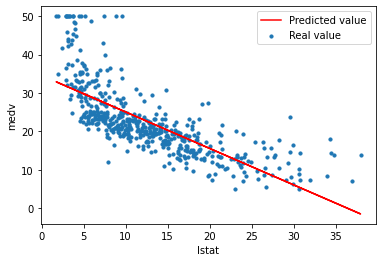

In [31]:
# Draw the plot
plt.scatter(x,y,label='Real value',s=10)
plt.plot(x,ols.fittedvalues,label='Predicted value',color='r')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.legend()
plt.show()

### 3.6.3 Multiple Linear Regression

In [32]:
x = Boston[['lstat','age']]
y = Boston['medv']

X = sm.add_constant(x) # Add the constant
ols = sm.OLS(y,X).fit()
print(ols.summary()) # Summary Results

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           2.98e-88
Time:                        17:55:39   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [33]:
x=Boston.drop('medv',axis=1)
y=Boston['medv']

X = sm.add_constant(x) # Add the constant
ols = sm.OLS(y,X).fit()
print(ols.summary()) # Summary Results

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 09 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        17:55:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [34]:
# Variance Inflation Factor, have to add the constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(len(X.columns))], 
              index=X.columns)
print(vif)

const      585.265238
crim         1.792192
zn           2.298758
indus        3.991596
chas         1.073995
nox          4.393720
rm           1.933744
age          3.100826
dis          3.955945
rad          7.484496
tax          9.008554
ptratio      1.799084
black        1.348521
lstat        2.941491
dtype: float64


### 3.6.4 Interaction Terms

In [35]:
# * includes lstat, age, and the interaction term lstat × age
# : only includes the interaction term lstat × age
f = 'medv~lstat*age' 
y, X = patsy.dmatrices(f, Boston, return_type='matrix')
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           4.86e-88
Time:                        17:55:42   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### 3.6.5 Non-linear Transformations of the Predictors

In [36]:
x = Boston['lstat']
y = Boston['medv']

x = np.column_stack((x, x**2, x**3))
X = sm.add_constant(x)
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Tue, 09 Mar 2021   Prob (F-statistic):          1.78e-116
Time:                        17:55:45   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.6496      1.435     33.909      0.0

In [37]:
# Or using PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures 
x = Boston['lstat'].values.reshape(-1, 1)
y = Boston['medv'].values

poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(x) 
ols = sm.OLS(y,X_poly).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Tue, 09 Mar 2021   Prob (F-statistic):          1.78e-116
Time:                        17:55:46   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.6496      1.435     33.909      0.0

In [38]:
from statsmodels.stats.anova import anova_lm
x = Boston['lstat']
y = Boston['medv']

# No interaction term
X1 = sm.add_constant(x)
ols1 = sm.OLS(y,X1).fit()

# With interaction term
x2 = np.column_stack((x, x**2))
X2 = sm.add_constant(x2)
ols2 = sm.OLS(y, X2).fit()

anova_lm(ols1,ols2)

/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


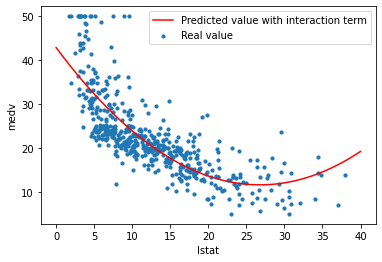

In [39]:
x_new = np.linspace(0,40,num=300)
x_new2 = np.column_stack((x_new, x_new**2))
X_new = sm.add_constant(x_new2)
y_new = ols2.predict(X_new)

# Draw the plot of interaction term function
plt.scatter(x,y,label='Real value',s=10)
plt.plot(x_new,y_new,label='Predicted value with interaction term',c='r')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.legend()
plt.show()

In [40]:
x = np.log(Boston['lstat']) # log(x)
y = Boston['medv']

X = sm.add_constant(x) # Add the constant
ols = sm.OLS(y,X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):          9.28e-122
Time:                        17:55:52   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.1248      0.965     54.004      0.0

### 3.6.6 Qualitative Predictors

In [41]:
Carseats = pd.read_csv('Carseats.csv')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [42]:
# Turn qualitative predictors into Dummy variables
dummy_fields = ['ShelveLoc','Urban','US']
for i in dummy_fields:
    dummies = pd.get_dummies(Carseats[i], prefix=i)
    Carseats = pd.concat([Carseats,dummies],axis=1)
    Carseats = Carseats.drop(i,axis=1)
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [43]:
f = 'Sales~Income:Advertising+Price:Age' 
y, x = patsy.dmatrices(f, Carseats, return_type='matrix')
X = np.column_stack((x, Carseats.drop('Sales',axis=1)))
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 09 Mar 2021   Prob (F-statistic):          6.14e-166
Time:                        17:55:55   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7861      0.428      8.839      0.0

### 3.6.7 Writing Functions